In [1]:
from dotenv import load_dotenv
load_dotenv()

import tensorflow_datasets as tfds
import tensorflow as tf
import torch
import os

assert torch.cuda.is_available()

import dask.dataframe as dd
import waymo_open_dataset
from waymo_open_dataset import v2
from waymo_open_dataset import dataset_pb2

import numpy as np
import pandas as pd

/home/zbloss/Projects/waymo-open/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-07 20:10:33.905494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 20:10:33.988511: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lib/:/home/zbloss/Projects/waymo-open/env/lib/python3.9/site-packages/nvidia/cudnn/lib:/lib/:/home/zbloss/Projects/waymo-open/

In [2]:
dataset_dir = '/mnt/harddrive/data/waymo_open_dataset/perception/training'

In [3]:
os.listdir(dataset_dir)

['lidar_box',
 'camera_segmentation',
 'stats',
 'camera_hkp',
 'lidar_calibration',
 'lidar_segmentation',
 'vehicle_pose',
 'projected_lidar_box',
 'lidar_hkp',
 'lidar_camera_projection',
 'lidar_camera_synced_box',
 'camera_to_lidar_box_association',
 'camera_box',
 'lidar_pose',
 'camera_calibration',
 'lidar',
 'camera_image']

In [4]:
example_filename = os.listdir(
    os.path.join(dataset_dir, 'camera_image')
)[0]

In [5]:
df = pd.read_parquet(os.path.join(dataset_dir, 'camera_image', example_filename))

In [6]:
df.head()

,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,[CameraImageComponent].image,[CameraImageComponent].pose.transform,[CameraImageComponent].velocity.linear_velocity.x,[CameraImageComponent].velocity.linear_velocity.y,[CameraImageComponent].velocity.linear_velocity.z,[CameraImageComponent].velocity.angular_velocity.x,[CameraImageComponent].velocity.angular_velocity.y,[CameraImageComponent].velocity.angular_velocity.z,[CameraImageComponent].pose_timestamp,[CameraImageComponent].rolling_shutter_params.shutter,[CameraImageComponent].rolling_shutter_params.camera_trigger_time,[CameraImageComponent].rolling_shutter_params.camera_readout_done_time
index,,,,,,,,,,,,,,,
7885161619764516373_289_280_309_280;1507239482035058,7885161619764516373_289_280_309_280,1507239482035058,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.551110066042867, -0.8335410061950792, -0.03...",3.217507,5.004948,0.195521,0.001858,0.017715,-0.417775,1.507239e+09,0.000383,1.507239e+09,1.507239e+09
7885161619764516373_289_280_309_280;1507239482035058,7885161619764516373_289_280_309_280,1507239482035058,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.5475857314736268, -0.8358487138690117, -0.0...",3.187807,5.004403,0.202627,0.001031,0.022340,-0.411791,1.507239e+09,0.000327,1.507239e+09,1.507239e+09
7885161619764516373_289_280_309_280;1507239482035058,7885161619764516373_289_280_309_280,1507239482035058,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.5441320847722226, -0.8380929838744041, -0.0...",3.157820,5.008471,0.205166,-0.001358,0.023564,-0.415635,1.507239e+09,0.000454,1.507239e+09,1.507239e+09
7885161619764516373_289_280_309_280;1507239482035058,7885161619764516373_289_280_309_280,1507239482035058,3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.5579702742178009, -0.828984434432379, -0.03...",3.275800,4.988616,0.199021,0.005895,0.020882,-0.415482,1.507239e+09,0.000313,1.507239e+09,1.507239e+09
7885161619764516373_289_280_309_280;1507239482035058,7885161619764516373_289_280_309_280,1507239482035058,5,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.5614654453930891, -0.8266292640821755, -0.0...",3.294120,4.999991,0.191860,0.005790,0.016373,-0.413251,1.507239e+09,0.000313,1.507239e+09,1.507239e+09


In [7]:
from glob import glob

In [8]:
files = glob(f'{dataset_dir}/**/10017090168044687777_6380_000_6400_000.parquet')
files

['/mnt/harddrive/data/waymo_open_dataset/perception/training/lidar_box/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/camera_segmentation/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/stats/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/camera_hkp/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/lidar_calibration/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/lidar_segmentation/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/vehicle_pose/10017090168044687777_6380_000_6400_000.parquet',
 '/mnt/harddrive/data/waymo_open_dataset/perception/training/projected_lidar_box/10017090168044687777_6380_000_6400_000.parquet',
 '/

In [9]:
def read(tag: str, context_name: str) -> dd.DataFrame:
    """Creates a Dask DataFrame for the component specified by its tag."""
    paths = tf.io.gfile.glob(f'{dataset_dir}/{tag}/{context_name}.parquet')
    return pd.read_parquet(paths)


In [10]:
cam_image_df = read(tag='camera_image', context_name='10017090168044687777_6380_000_6400_000')
cam_box_df = read(tag='camera_box', context_name='10017090168044687777_6380_000_6400_000')

In [11]:
# Combine DataFrame for individual components into a single DataFrame.

# Camera cam_box_df will be grouped, so each row will have a camera image
# and all associated boxes.
image_w_box_df = v2.merge(cam_image_df, cam_box_df, right_group=True)

# Show raw data
image_w_box_df.head()

,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,[CameraImageComponent].image,[CameraImageComponent].pose.transform,[CameraImageComponent].velocity.linear_velocity.x,[CameraImageComponent].velocity.linear_velocity.y,[CameraImageComponent].velocity.linear_velocity.z,[CameraImageComponent].velocity.angular_velocity.x,[CameraImageComponent].velocity.angular_velocity.y,...,[CameraImageComponent].rolling_shutter_params.camera_trigger_time,[CameraImageComponent].rolling_shutter_params.camera_readout_done_time,key.camera_object_id,[CameraBoxComponent].box.center.x,[CameraBoxComponent].box.center.y,[CameraBoxComponent].box.size.x,[CameraBoxComponent].box.size.y,[CameraBoxComponent].type,[CameraBoxComponent].difficulty_level.detection,[CameraBoxComponent].difficulty_level.tracking
0,10017090168044687777_6380_000_6400_000,1550083467346370,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9482868309813268, -0.23495154098744556, 0.2...",5.765131,1.371270,-1.329111,-0.010016,-0.014922,...,1.550083e+09,1.550083e+09,"[12ba81ee-9cee-4134-94ca-df9ed01e0ff1, 2ab9ff5...","[1466.5519800000002, 1109.07204, 1181.70489, 1...","[492.6402, 536.8515, 519.16698, 486.9558899999...","[240.63579000000004, 178.73997000000008, 61.89...","[109.89666, 156.00273000000004, 95.37008999999...","[1, 1, 1, 1, 1]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]"
1,10017090168044687777_6380_000_6400_000,1550083467346370,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9487161220058431, -0.23293730459068215, 0.2...",5.757565,1.392409,-1.327417,0.003401,-0.011684,...,1.550083e+09,1.550083e+09,"[63c84d73-3c52-4c22-8a14-55a797622e69, df9d5e7...","[1460.86767, 1418.55114]","[672.64335, 752.22369]","[226.10922000000005, 248.84645999999998]","[102.31758000000002, 201.47721]","[1, 1]","[nan, nan]","[nan, nan]"
2,10017090168044687777_6380_000_6400_000,1550083467446163,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9460454274905595, -0.2446805774969256, 0.21...",5.726245,1.409312,-1.290130,-0.007733,0.002890,...,1.550083e+09,1.550083e+09,"[12ba81ee-9cee-4134-94ca-df9ed01e0ff1, 2ab9ff5...","[1496.8683, 1131.80928, 1208.23167, 1028.86011...","[485.06111999999996, 534.95673, 515.37744, 492...","[248.21487000000002, 182.52951000000007, 65.68...","[109.89666000000005, 159.16067999999996, 102.9...","[1, 1, 1, 1, 1]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]"
3,10017090168044687777_6380_000_6400_000,1550083467446163,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9465555679557249, -0.24271678155288484, 0.2...",5.731619,1.410772,-1.297965,0.003404,-0.000025,...,1.550083e+09,1.550083e+09,"[63c84d73-3c52-4c22-8a14-55a797622e69, df9d5e7...","[1458.9729000000002, 1402.7613900000001]","[676.43289, 750.3289199999999]","[233.05671000000007, 261.4782600000001]","[106.10712000000001, 206.52993000000004]","[1, 1]","[nan, nan]","[nan, nan]"
4,10017090168044687777_6380_000_6400_000,1550083467545990,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9437869624586903, -0.2530721861296418, 0.21...",5.675340,1.474018,-1.279818,-0.015926,0.005122,...,1.550083e+09,1.550083e+09,"[12ba81ee-9cee-4134-94ca-df9ed01e0ff1, 24cd98d...","[1528.4478, 1266.3379499999999, 1156.441289999...","[478.11363, 511.5879, 536.8515, 515.37744, 485...","[248.21487000000002, 8.842259999999897, 184.42...","[109.89666, 19.579289999999958, 164.8449900000...","[1, 1, 1, 1, 1, 1]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"


In [12]:
# Example how to access data fields via v2 object-oriented API
print(f'Available {image_w_box_df.shape[0]} rows:')
for i, (_, r) in enumerate(image_w_box_df.iterrows()):
  # Create component dataclasses for the raw data
  cam_image = v2.CameraImageComponent.from_dict(r)
  cam_box = v2.CameraBoxComponent.from_dict(r)
  print(
      f'context_name: {cam_image.key.segment_context_name}'
      f' ts: {cam_image.key.frame_timestamp_micros}'
      f' camera_name: {cam_image.key.camera_name}'
      f' image size: {len(cam_image.image)} bytes.'
      f' Has {len(cam_box.key.camera_object_id)} camera labels:'
  )

  for j, (object_id, x, y) in enumerate(zip(
      cam_box.key.camera_object_id, cam_box.box.center.x, cam_box.box.center.y
  )):
    print(f'\tid: {object_id},  center: ({x:.1f}, {y:.1f}) px')
    if j > 2:
      print('\t...')
      break
  if i > 2:
    print('...')
    break


Available 685 rows:
context_name: 10017090168044687777_6380_000_6400_000 ts: 1550083467346370 camera_name: 1 image size: 412699 bytes. Has 5 camera labels:
	id: 12ba81ee-9cee-4134-94ca-df9ed01e0ff1,  center: (1466.6, 492.6) px
	id: 2ab9ff55-a510-435b-a729-884444e67249,  center: (1109.1, 536.9) px
	id: 470e3826-ecd2-425c-80ca-33f3d8c876a6,  center: (1181.7, 519.2) px
	id: 98fcf17a-d19e-4c3b-bbc0-54ae2d1fcc15,  center: (1006.1, 487.0) px
	...
context_name: 10017090168044687777_6380_000_6400_000 ts: 1550083467346370 camera_name: 2 image size: 389779 bytes. Has 2 camera labels:
	id: 63c84d73-3c52-4c22-8a14-55a797622e69,  center: (1460.9, 672.6) px
	id: df9d5e7d-c686-4425-a227-d0299043ade8,  center: (1418.6, 752.2) px
context_name: 10017090168044687777_6380_000_6400_000 ts: 1550083467446163 camera_name: 1 image size: 413054 bytes. Has 5 camera labels:
	id: 12ba81ee-9cee-4134-94ca-df9ed01e0ff1,  center: (1496.9, 485.1) px
	id: 2ab9ff55-a510-435b-a729-884444e67249,  center: (1131.8, 535.0) px

In [18]:
from PIL import Image, ImageDraw

import torchvision

In [50]:
xy = list(zip(cam_box.box.center.x, cam_box.box.center.y))

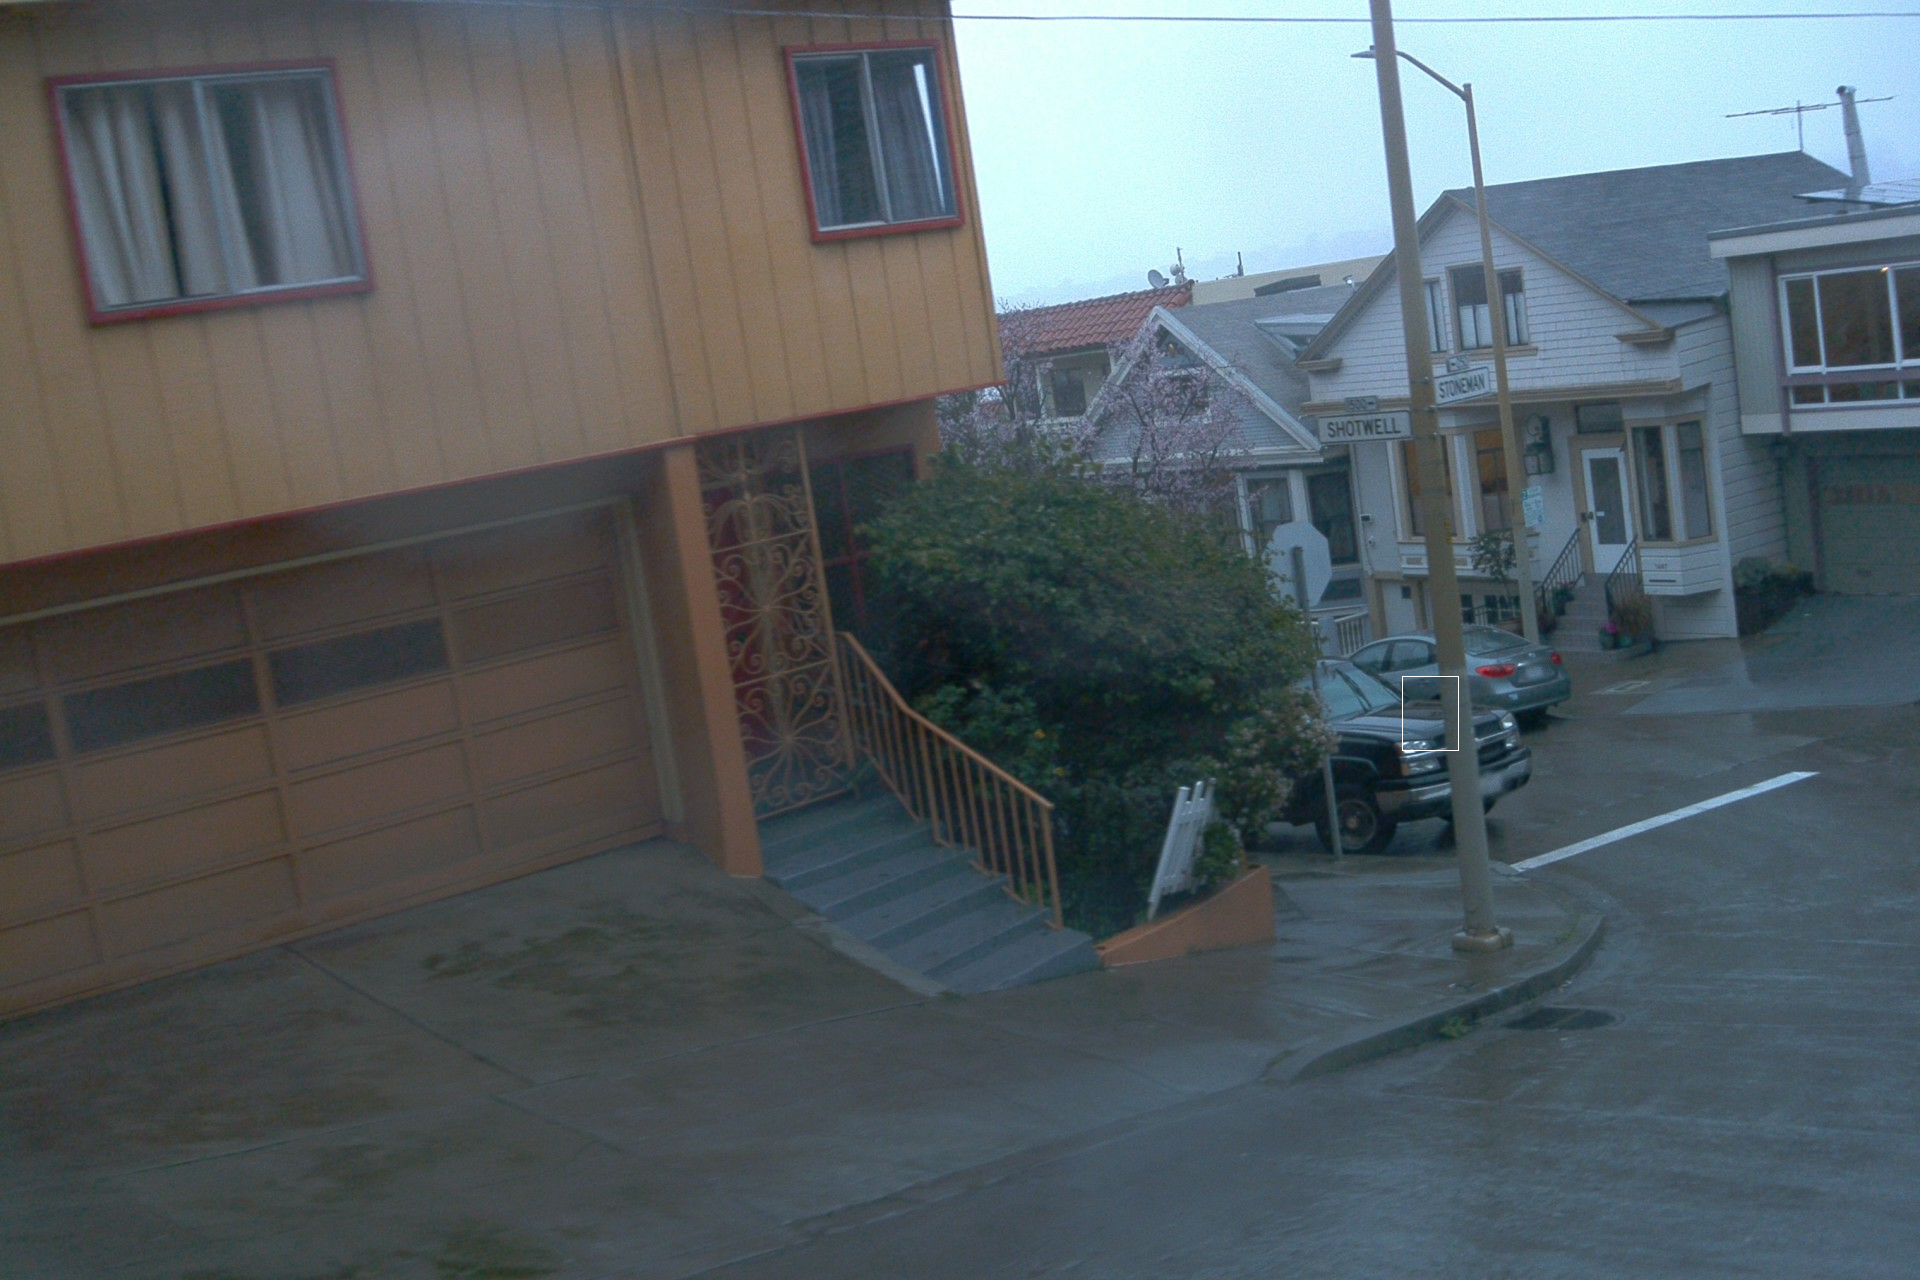

In [51]:
image_array = tf.io.decode_png(cam_image.image).numpy()
image = Image.fromarray(image_array)

img1 = ImageDraw.Draw(image)
img1.rectangle(xy, outline="white")
image

In [53]:
import base64

In [55]:
decoded = base64.b64decode((cam_image.image))